# Name: Kunal Ghosh

# Course: M.Tech (Aerospace Engineering)

# Subject: AE 291 (Matrix Computations)

# SAP No.: 6000007645

# S.R. No.: 05-01-00-10-42-22-1-21061

********************************************************************************************************************

# Importing the necessary libraries

In [1]:
import numpy as np

In [2]:
from matplotlib import cm

In [3]:
import matplotlib.pyplot as plt

In [4]:
import sys

# Problem: 
## Solving 2D Poisson’s problem using Steepest Descent and Conjugate Gradient iterative methods
## Consider the 2D Poisson’s equation in the domain $\Omega$ = [0,1] $\times$ [0, 1], the unit square:

$$-\frac{\partial^2 u}{\partial x^2 } -\frac{\partial^2 u}{\partial y^2 } = f\qquad in \qquad \Omega, \tag{1}$$

## with the boundary condition
$$u = g \qquad on \qquad \partial \Omega \tag{2}$$ 

## where f and g are given functions, and ∂Ω represents the boundary of Ω. Eq. 1 can be discretized using the centered Finite difference method (as explained in the class).

## Consider the case where f = 0, and g is given as,

$$g(x,y) = \begin{cases}
0 \qquad\qquad\qquad if\:x = 0
\\
y \qquad\qquad\qquad if\:x = 1
\\
(x-1)sin(x) \:\:\:\:\:\:\: if\:y = 0
\\
x(2-x) \qquad\:\:\:\:\:\: if\:y = 1
\end{cases}$$

## Write two separate codes; one for Steepest Descent (SD) and other for Conjugate Gradient (CG) for solving the discretized Poisson’s equation. For both the methods, take the initial guess as $u^{(0)}$ = 0, and consider three mesh intervals: h = 1/10, h = 1/20 and h = 1/40. The iterations should be continued until the relative change in the solution u from one iteration to another is less than $10^{-8}$. More precisely, stop the iterations when

$$\frac{||u^{(k+1)}-u^{(k)}||_2}{||u^{(k+1)}||_2} < 10^{-8} \tag{3}$$

********************************************************************************************************************

## Along with the codes, submit a short report with the following items:

## 1. For each method (SD and CG), for each ”h”, plot the relative change in the solution (LHS of Eq. 3) versus the iteration index (k). In the plot, the relative change in the solution should be in base-10 logarithmic scale (For example, see the command ”semilogy” in matlab)

********************************************************************************************************************

## Answer (1): Conjugate Gradient (CG)

## Set of values of the h

In [5]:
H = [1/10,1/20,1/40]

## Defining the domain: $\Omega$ = [0,1] $\times$ [0, 1]

In [6]:
x_0 = 0

In [7]:
x_l = 1

In [8]:
y_0 = 0

In [9]:
y_l = 1

## Function to implement the boundary conditions

$$g(x,y) = \begin{cases}
0 \qquad\qquad\qquad if\:x = 0
\\
y \qquad\qquad\qquad if\:x = 1
\\
(x-1)sin(x) \:\:\:\:\:\:\: if\:y = 0
\\
x(2-x) \qquad\:\:\:\:\:\: if\:y = 1
\end{cases}$$

In [10]:
def g(x,y):
    """
    g(x,y) sets the boundary conditions at based on the coordinates of the node, x and y.
    If the given node does not lie on the boundary then 0 will be returned.
    x: x coordinate
    y: y coordinate
    """
    if x == 0:
        return 0
    if x == 1:
        return y
    if y == 0:
        return (x-1)*np.sin(x)
    if y == 1:
        return x*(2-x)
    else: 
        return 0

$$f = 0$$

In [11]:
def f(x,y):
    """
    f(x,y) evaluated the function f of the question based on the coordinates of the node, x and y.
    x: x coordinate
    y: y coordinate
    """
    return 0

## Stopping criteria:

$$\frac{||u^{(k+1)}-u^{(k)}||_2}{||u^{(k+1)}||_2} < 10^{-8} \tag{3}$$

In [12]:
def Error_Function(u_new,u):
    """
    Error_Function(u_new,u) evaluates the error.
    u_new: u(k+1)
    u: u(k)
    """
    
    # Calculating the numerator
    temp = (((u_new.flatten()-u.flatten())**2).sum())**0.5
    
    # Calculating the denominator
    temp_1 = (((u_new.flatten())**2).sum())**0.5
    
    # Calculating the error
    temp = temp/temp_1
    
    return temp

In [13]:
Tolerance = 1e-8

## A dictionary to store errors

In [14]:
Error = {}

## A dictionary to store u

## NOTE: We will be storing u  such that $u \in \mathbb{R}^{2}$

In [15]:
U = {}

## A dictionary to store meshgrids

In [16]:
X_Y_dict = {}

## Function to calculate the product of two matrices 

In [17]:
def MatMul(A,B):
    """
    MatMul(A,B) multiply two matrices A and B of compatible sizes
    NOTE: This function is a generic matrix multiplication function.
    """
    
    # We are copying A and B because we will be reshaping them
    a = A.copy()
    b = B.copy()
    
    # Checking the dimension of a
    if len(a.shape) > 2:
        print(f"A is NOT a matrix.")
        sys.exit()

    # Checking the dimension of b
    if len(b.shape) > 2:
        print(f"B is NOT a matrix.")
        sys.exit()
            
    # a will be I x J
    # b will be J x K
    
    I = a.shape[0]
    
    # To take care of the vectors
    if len(a.shape) < 2:
        J = 1
    else:
        J = a.shape[1]
    
    # To take care of the vectors    
    if len(b.shape) < 2:
        K = 1
    else:
        K = b.shape[1]
    
    # Checking if the dimensions of A and B are compatible for multiplication or NOT.    
    if J != b.shape[0]:
        print(f"Dimensions of A and B are NOT compatible.")
        sys.exit()
    
    # Prod matrix will store the results
    Prod = np.zeros((I,K))
    
    # a will be I x J
    a = a.reshape(I,J)
    
    # b will be J x K
    b = b.reshape(J,K)
    
    # Multiplying the matrix A and matrix B
    for i in range(I):
        for j in range(J):
            for k in range(K):
                Prod[i][k] = Prod[i][k] + (a[i][j]*b[j][k])
    
    # Returning the matrix product
    return Prod

## Discretization:

$$-\frac{\partial^2 u}{\partial x^2 } -\frac{\partial^2 u}{\partial y^2 } = f\qquad in \qquad \Omega$$

$$\frac{\partial^2 u}{\partial x^2 } + \frac{\partial^2 u}{\partial y^2 } = -f\qquad in \qquad \Omega$$

$$\Delta x = \Delta y = h$$

$$\frac{u_{(i+1,j)} - 2u_{(i,j)} + u_{(i-1,j)}}{h^2 } + \frac{u_{(i,j+1)} - 2u_{(i,j)} + u_{(i,j-1)}}{h^2 } = f_{(i,j)}$$

or, $$\frac{u_{(i+1,j)} - 2u_{(i,j)} + u_{(i-1,j)} + u_{(i,j+1)} - 2u_{(i,j)} + u_{(i,j-1)}}{h^2 } = f_{(i,j)}$$

or, $$\frac{u_{(i+1,j)} + u_{(i,j+1)} - 4u_{(i,j)} + u_{(i-1,j)} + u_{(i,j-1)}}{h^2 } = f_{(i,j)}$$

or, $$u_{(i+1,j)} + u_{(i,j+1)} - 4u_{(i,j)} + u_{(i-1,j)} + u_{(i,j-1)} = h^2f_{(i,j)}$$

or, $$u_{(i+1,j)} + u_{(i,j+1)} - 4u_{(i,j)} + u_{(i,j-1)} + u_{(i-1,j)} = h^2f_{(i,j)}$$

Let, $$I = I(i,j) = (n_x \times i) + j$$

So, $$u_{(i,j)} = u_{I}$$

So, $$I(i,j-1) = (n \times i) + j - 1$$

or, $$I(i,j-1) = I - 1$$

So, $$u_{(i,j-1)} = u_{I-1}$$

Also, $$I(i,j+1) = (n_x \times i) + j + 1$$

or, $$I(i,j+1) = I + 1$$

So, $$u_{(i,j+1)} = u_{I+1}$$

Also, $$I(i-1,j) = (n_x \times (i-1)) + j$$

or, $$I(i-1,j) = I - n_x$$

So, $$u_{(i-1,j)} = u_{I-n_x}$$

Also, $$I(i+1,j) = (n_x \times (i+1)) + j$$

or, $$I(i+1,j) = I + n_x$$

So, $$u_{(i+1,j)} = u_{I + n_x}$$

So, $$u_{I+n_x} + u_{I+1} - 4u_{I} + u_{I-1} + u_{I-n_x} = h^2f_{I}$$

## Function to calculate the product of A and any vector

In [18]:
def MatMul_A_Vector(b,n,n_x):
    """
    MatMul_A_Vector(b,n,n_x) multiply matrix A for this particular case and a generic vector b of compatible sizes.
    NOTE: We are exploiting the sparse nature of the matrix A.
    NOTE: This function is specific to this problem only and NOT a generic matrix multiplication function.
    """
    
    # A will be I x J
    # b will be J x K
    
    I = n
    
    # Checking the dimension of b
    if len(b.shape) != 2:
        if b.shape[1] != 1:
            print(f"b is NOT a vector.")
            sys.exit()
            
    # Checking if the dimensions of A and b are compatible for multiplication or NOT.            
    if b.shape[0] != n:
        print(f"Dimensions of A and b are not compatible.")
        sys.exit()
    
    J = n
    
    K = 1
    
    # Prod matrix will store the results
    Prod = np.zeros((I,K))
    
    # b will be J x K
    b = b.reshape(J,K)
    
    # Doing the matrix multiplication by only multiplying the non-zero elements

    for i in range(0,n_x):
        Prod[i][0] = b[i][0]
        
    for i in range(n_x,I-n_x):
        if (i%n_x == 0) or ((i+1)%n_x == 0):
            Prod[i][0] = b[i][0]
        else:
            Prod[i][0] = Prod[i][0] + (-4*b[i][0])
            Prod[i][0] = Prod[i][0] + (b[i+1][0])
            Prod[i][0] = Prod[i][0] + (b[i-1][0])
            Prod[i][0] = Prod[i][0] + (b[i+n_x][0])
            Prod[i][0] = Prod[i][0] + (b[i-n_x][0])
    
    for i in range(I-n_x,I):
        Prod[i][0] = b[i][0]
    
    # Returning the matrix product
    return Prod

## Conjugate Gradient (CG) Algorithm for Au = b

$r^{(0)} \leftarrow (b - Au^{(0)})$

$P^{(0)} \leftarrow r^{(0)}$

do until convergence:

$\qquad q^{(k)} \leftarrow AP^{(k)}$

$\qquad \alpha^{(k)} \leftarrow \frac{(r^{(k)})^Tr^{(k)}}{(P^{(k)})^Tq^{(k)}}$

$\qquad u^{(k+1)} \leftarrow (u^{(k)} + \alpha^{(k)}P^{(k)})$

$\qquad r^{(k+1)} \leftarrow (r^{(k)} + \alpha^{(k)}q^{(k)})$

$\qquad \beta^{(k)} \leftarrow \frac{(r^{(k+1)})^Tr^{(k+1)}}{(r^{(k)})^Tr^{(k)}}$

$\qquad P^{(k+1)} \leftarrow (r^{(k+1)} + \beta^{(k)}P^{(k)})$

$\qquad k \leftarrow (k+1)$

In [19]:
def CG_Solver(r,u,U,Error,Tolerance,f,x,y,h,n,n_x,n_y):
    """
    CG_Solver(b,u,U,Error,Tolerance,f,x,y,h,n_x,n_y): Solves the given poisson equation using the Conjugate Gradient (CG) method
    r: r is the residual but b is stored in r, where Au = b and r = b-(Au)
    u: Initial value of u in the computational domain
    U: Dictionary to store u for different values of h
    Error: Dictionary to store error at each iterations for different values of h
    Tolerance: Stopping Criteria
    f: RHS of the equation
    x: X Meshgrid
    y: Y Meshgrid
    h: Grid Spacing
    n: Total number of grid points
    n_x: Number of the grid points in the x-directions
    n_y: Number of the grid points in the y-directions
    """
    
    # Intializing the tolerance achieved
    temp = Tolerance + 1

    # Error over iterations for some particular h
    error = []

    # Conjugate Gradient (CG) method
    
    # r = b-(Au)
    r = r-MatMul_A_Vector(u,n,n_x)
    P = r.copy()
        
    # While loop until the stopping criteria is met
    while temp >= Tolerance:
        u_old = u.copy()
        # q = AP
        q = MatMul_A_Vector(P,n,n_x)
        alpha = MatMul(r.T,r)/MatMul(P.T,q)
        u = u + (alpha*P)
        r_old = r.copy()
        r = r - (alpha*q)
        beta = MatMul(r.T,r)/MatMul(r_old.T,r_old)
        P= r + (beta*P)
        
        # Calculating the relative error
        temp = Error_Function(u,u_old)
        
        # Storing the errors corresponding to each iteration
        error.append(temp)
        
    # Storing u in the dictionary for some particular h
    U[h] = u_old.reshape((n_x,n_y))
    
    # Storing error in the dictionary for some particular h
    Error[h] = error

In [20]:
X_Y_dict

{}

In [21]:
# Iterating over different values of h (Mesh Interval)
for h in H:
    
    # Mesh intervals
    dx = h
    dy = h

    # Number of grid points in x-directions
    n_x = int((x_l-x_0)/h + 1)
    
    # Number of grid points in y-directions
    n_y = int((y_l-y_0)/h + 1)

    # Total number of grid points
    n = n_x*n_y

    # A matrix to store grid numbering associated with a particular h
    I = np.zeros((n_x,n_y),dtype = np.int32)

    # A matrix to store the solution associated with a particular h
    u = np.zeros((n_x,n_y))

    # Creating a meshgrid
    x = np.arange(x_0,x_l+dx,dx)
    y = np.arange(y_0,y_l+dy,dy)
    X,Y = np.meshgrid(x,y,indexing = "ij")

    # Storing meshgrids
    X_Y_dict[h] = (X,Y)

    # Applying the boundary conditions and storing the grid numbers
    for i in range(u.shape[0]):
        for j in range(u.shape[1]):
            
            # Applying the boundary conditions
            u[i,j] = g(x[i],y[j])
            
            # Storing the grid numbers
            I[i,j] = int((n_x*i)+j)

    # Storing u as a vector
    u_linear = u.flatten()

    # Treating vector as a matrix
    u_linear = u_linear.reshape(u_linear.shape[0],1)

    # RHS vector stored as matrix
    b = np.zeros((n,1))

    # Applying the boundary conditions
    for i in range(u.shape[0]):
        for j in range(u.shape[1]):
            if i == 0: 
                b[I[i,j],0] = u_linear[I[i,j]] + ((h**2)*f(x[i],y[j]))
            if i == (u.shape[0]-1):
                b[I[i,j],0] = u_linear[I[i,j]] + ((h**2)*f(x[i],y[j]))
            if j == 0: 
                b[I[i,j],0] = u_linear[I[i,j]] + ((h**2)*f(x[i],y[j]))
            if j == (u.shape[1]-1):
                b[I[i,j],0] = u_linear[I[i,j]] + ((h**2)*f(x[i],y[j]))
            b[I[i,j]] =  b[I[i,j]] + ((h**2)*f(x[i],y[j]))

    # Intializing the u at the current iteraion with zeros
    u = np.zeros(((int((x_l-x_0)/dx))+1,(int((y_l-y_0)/dy))+1))

    # Applying the boundary conditions to u
    for i in range(u.shape[0]):
        for j in range(u.shape[1]):
            u[i,j] = g(x[i],y[j])

    # Solving the system of equation using CG Method
    # NOTE: b will be modified after the excution of this function
    CG_Solver(b,u_linear,U,Error,Tolerance,f,x,y,h,n,n_x,n_y)

    # Number of iterations required
    iteraions = len(Error[h])

    # Printing the value of h
    print(f"For h = {h}:")
    
    # Printing the number of iterations required
    print(f"Number of iterations required: {iteraions}\n\n")

For h = 0.1:
Number of iterations required: 29


For h = 0.05:
Number of iterations required: 60


For h = 0.025:
Number of iterations required: 118




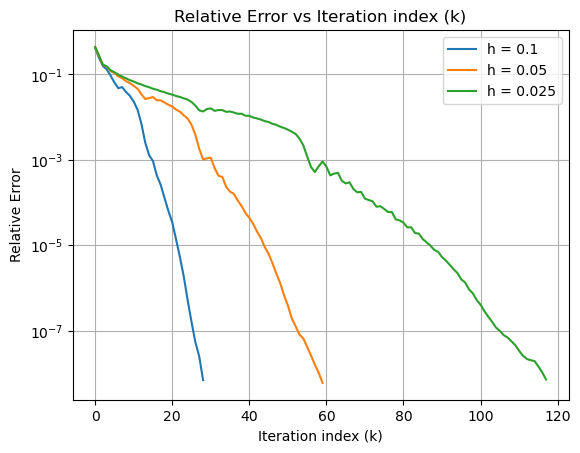

In [22]:
for h,error in Error.items():
    plt.semilogy(error,label = "h = "+str(h))
plt.legend()
# NOTE: Here, the iteration index k starts from 0
plt.xlabel("Iteration index (k)")
plt.ylabel("Relative Error")
plt.title(f"Relative Error vs Iteration index (k)")
plt.grid()
plt.show()

********************************************************************************************************************

## 2. For each method (SD and CG), for each ”h”, show the 3D surface plot of the final solution u (as a function of x and y).

********************************************************************************************************************

## Answer (2): Conjugate Gradient (CG)

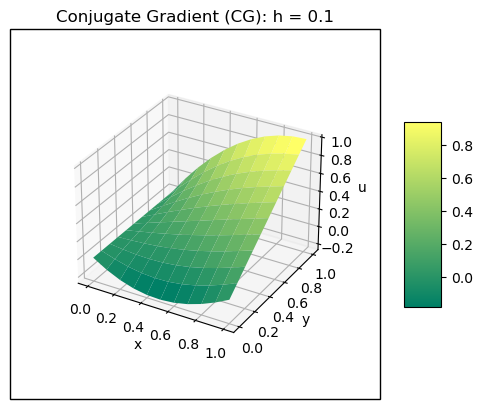

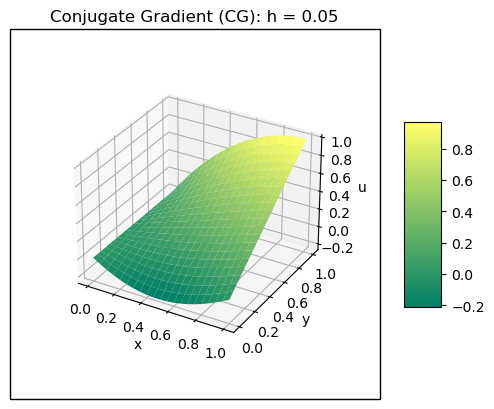

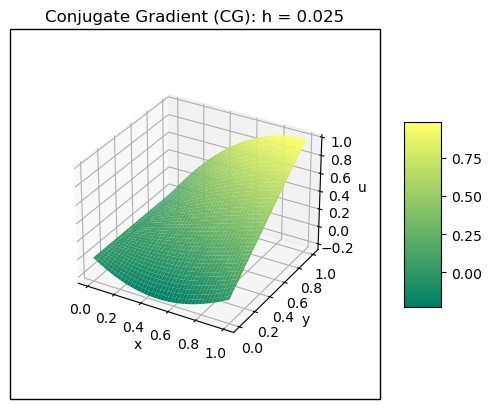

In [23]:
for h,u in U.items():
    fig = plt.figure()
    ax = fig.add_subplot(projection = "3d")
    surf = ax.plot_surface(X_Y_dict[h][0], X_Y_dict[h][1], u, cmap=cm.summer,linewidth=0)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("u")
    ax.set_title(f"Conjugate Gradient (CG): h = {h}")
    ax.set_box_aspect(aspect=None, zoom=0.75)
    ax.patch.set_edgecolor('black')  
    ax.patch.set_linewidth(1)  
plt.show()

********************************************************************************************************************

## 3. A table comparing the iterations required to reach the convergence criteria for Jacobi, Gauss-Seidel, Steepest Descent and Conjugate gradient for all three ”h” values.

********************************************************************************************************************

## Answer (3):

## Iterations required to reach the convergence criteria for Jacobi, Gauss-Seidel, Steepest Descent and Conjugate Gradient

$$
\begin{aligned}
& \text {}\\
&\begin{array}{|c|c|c|c|c|}
\hline \hline \text { h } & \text { Jacobi } & \text { Gauss-Seidel } & \text { Steepest Descent }  & \text { Conjugate Gradient } \\
\hline \frac{1}{10} & 293 & 157 & 297 & 29\\
\hline
\frac{1}{20} & 1077 & 574 & 1102 & 60\\
\hline
\frac{1}{40} & 3882 & 2069 & 3986 & 118\\
\hline
\end{array}
\end{aligned}
$$

In [24]:
J = [293,1077,3882]
GS = [157,574,2069]
SD = [297,1102,3986]
CG = [29,60,118]

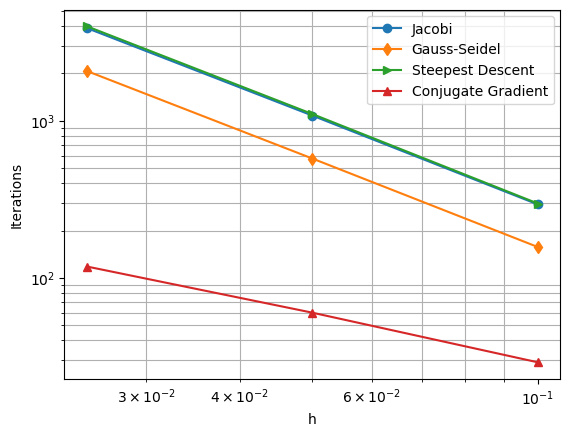

In [25]:
plt.loglog(H,J,"o-",label = "Jacobi")
plt.loglog(H,GS,"d-",label = "Gauss-Seidel")
plt.loglog(H,SD,">-",label = "Steepest Descent")
plt.loglog(H,CG,"^-",label = "Conjugate Gradient")
plt.legend()
plt.grid(which='minor')
plt.xlabel("h")
plt.ylabel("Iterations")
plt.show()

## Observations:

### 1. Conjugate Gradient method requires considerably less iterations as compared to other methods

### 2. Steepest Descent method is the slowest method among all the reported methods.

### 3. Jacobi method is marginally faster as compared to the Steepest Descent method.

### 4. Gauss-Siedel method is approximately twice as fast as the Jacobi and the Steepest Descent methods.

### 5. As h reduces, the number of iterations required for Conjugate Gradient method increased at a slower rate as compared to the other methods

### 6. The rate of increase in the iterations required for Jacobi, Gauss-Seidel and Steepest Descent is almost the same. (The slopes are almost equal for these methods)